In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read csv file
df = pd.read_csv('/content/drive/MyDrive/data/customer_shopping_data.csv',encoding='unicode_escape')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.shape

(99457, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [7]:
# change data type
df['invoice_date']=pd.to_datetime(df['invoice_date'], dayfirst=True)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [8]:
df['invoice_date'].dtypes

dtype('<M8[ns]')

In [9]:
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month
df['day'] = df['invoice_date'].dt.day
df['month_year'] = df['invoice_date'].dt.to_period('M').astype(str)

df[['invoice_date','year','month','month_year']].head()

,invoice_date,year,month,month_year
0,2022-08-05,2022,8,2022-08
1,2021-12-12,2021,12,2021-12
2,2021-11-09,2021,11,2021-11
3,2021-05-16,2021,5,2021-05
4,2021-10-24,2021,10,2021-10


In [10]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall', 'year',
       'month', 'day', 'month_year'],
      dtype='object')

In [11]:
df.describe()

,age,quantity,price,invoice_date,year,month,day
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,2021.629408,6.113898,15.569603
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,2021.000000,1.000000,1.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,2021.000000,3.000000,8.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,2022.000000,6.000000,16.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,2022.000000,9.000000,23.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,2023.000000,12.000000,31.000000
std,14.990054,1.413025,941.184567,NaN,0.636136,3.569511,8.799894


In [12]:
#specific columns
df[['age', 'quantity', 'price']].describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [31]:
df['Amount'] = df['price'] * df['quantity']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,day,month_year,Age Group,Amount
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,5,2022-08,25-30,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,12,2021-12,20-25,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,9,2021-11,20-25,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,16,2021-05,65-70,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,24,2021-10,50-55,242.40


# Exploratory Data Analysis

KPI

In [32]:
# --- KPIs ---

# Total Revenue
total_revenue = df['Amount'].sum()
print("Total Revenue:", total_revenue)

# Average Order Value (total revenue ÷ number of unique orders)
avg_order_value = df.groupby('invoice_no')['Amount'].sum().mean()
print("Average Order Value:", avg_order_value)

# Total Customers
total_customers = df['customer_id'].nunique()
print("Total Customers:", total_customers)

Total Revenue: 251505794.25000003
Average Order Value: 2528.7892682264696
Total Customers: 99457


- Your business generated about 251.5 million TRY in total sales from nearly 99.5k unique customers. On average, each order was worth around 2.5k TRY.







Gender

/tmp/ipython-input-3225559597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


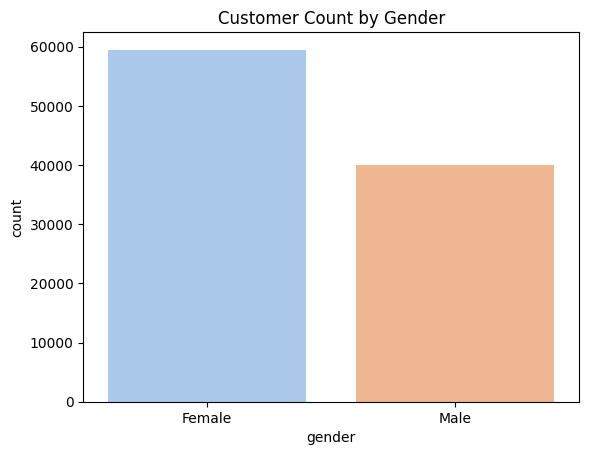

gender
Female    1.502071e+08
Male      1.012987e+08
Name: Amount, dtype: float64


In [33]:
# --- Gender Analysis ---

# Plot customer count by gender
sns.countplot(
    x='gender',
    data=df,
    palette="pastel"
)
plt.title("Customer Count by Gender")
plt.show()

# Total revenue by gender
gender_sales = df.groupby('gender')['Amount'].sum()
print(gender_sales)


- From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

Age

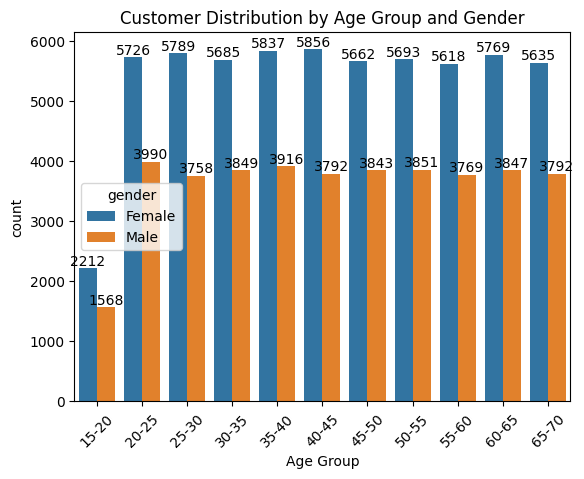

In [36]:
# --- Create Age Groups ---
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ['15-20','20-25','25-30','30-35','35-40',
          '40-45','45-50','50-55','55-60','60-65','65-70']

df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# --- Age Group Distribution by Gender ---
ax = sns.countplot(data=df, x='Age Group', hue='gender')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Customer Distribution by Age Group and Gender")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2797463413.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group', as_index=False)['Amount']
/tmp/ipython-input-2797463413.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Amount', data=sales_age, palette="tab10")


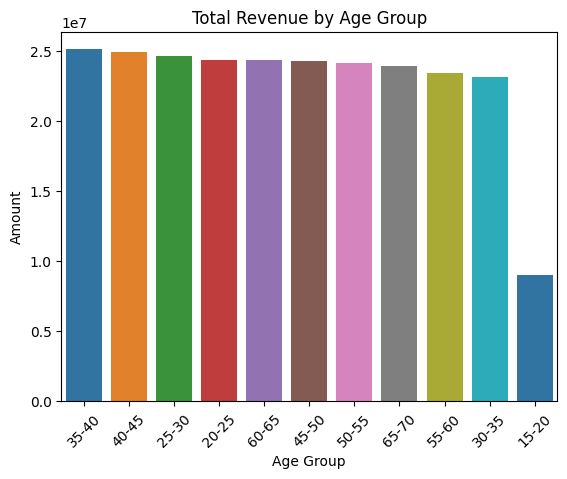

In [37]:


sales_age = (
    df.groupby('Age Group', as_index=False)['Amount']
    .sum()
    .sort_values(by='Amount', ascending=False)
)

sales_age['Age Group'] = sales_age['Age Group'].astype(str)  # break category order

sns.barplot(x='Age Group', y='Amount', data=sales_age, palette="tab10")
plt.title("Total Revenue by Age Group")
plt.xticks(rotation=45)
plt.show()


- The largest customer base is in the 30–40 age range, with both males and females actively shopping.

- Across all age groups, female customers consistently outnumber male customers.

- The 15–20 group has the lowest customer count compared to others, meaning very young shoppers are fewer.

- After age 20, the distribution is fairly stable, showing strong participation of middle-aged shoppers in malls.

Product Category

/tmp/ipython-input-3005219446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='Amount', data=sales_category,palette="pastel")


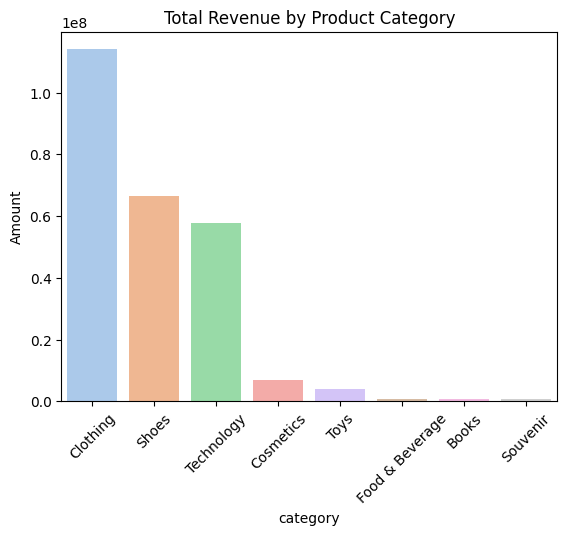

In [39]:
# --- Revenue by Product Category---
sales_category = (
    df.groupby('category', as_index=False)['Amount']
    .sum()
    .sort_values(by='Amount', ascending=False)
)

sns.barplot(x='category', y='Amount', data=sales_category,palette="pastel")
plt.title("Total Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()

- From the graphs, we can see that most of the sold products belong to the Clothing, Shoes, and Technology categories. Since the dataset is collected from shopping malls, this trend makes sense.

/tmp/ipython-input-3259711490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette="Set3")


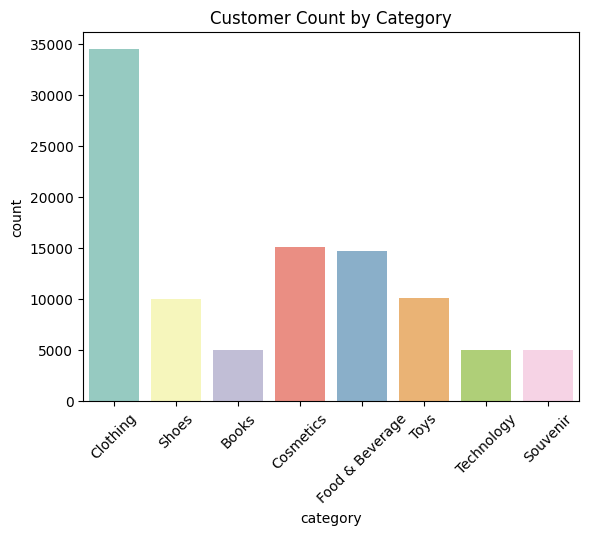

In [41]:
#--Customer Count By Product Category--
sns.countplot(x='category', data=df, palette="Set3")
plt.title("Customer Count by Category")
plt.xticks(rotation=45)
plt.show()

- From the above graphs, we can see the difference between revenue by product category and customer count, because count shows popularity of products (how many times they were bought), while revenue shows profitability (how much money they brought in).Clothing is the most frequently bought category, but Technology generates more revenue due to higher product prices.

/tmp/ipython-input-1617840679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_method', data=df, palette="pastel")


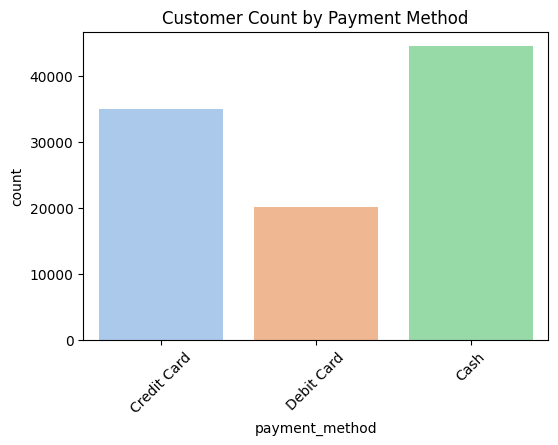

In [43]:
# --Customer Count by Payment Method--
plt.figure(figsize=(6,4))
sns.countplot(x='payment_method', data=df, palette="pastel")
plt.title("Customer Count by Payment Method")
plt.xticks(rotation=45)
plt.show()

- Most purchases were made using cash, followed by credit cards, and finally debit cards.

Shopping Mall

/tmp/ipython-input-3164229364.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3164229364.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


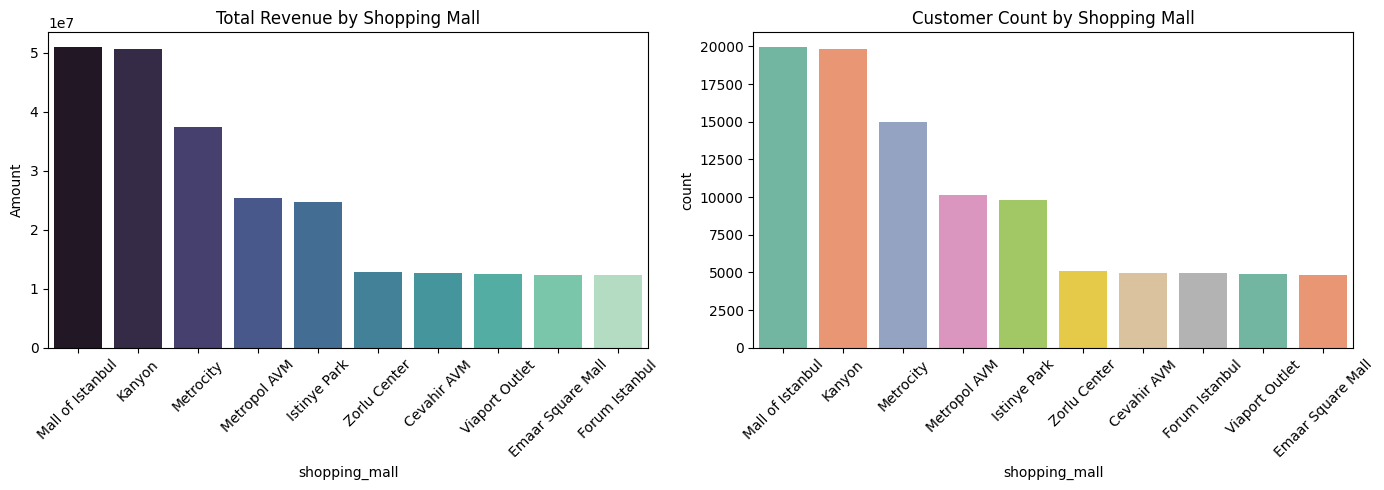

In [47]:
# --Revenue by Shopping Mall--
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Revenue by Shopping Mall
sales_mall = (
    df.groupby('shopping_mall', as_index=False)['Amount']
    .sum()
    .sort_values(by='Amount', ascending=False)
)

sns.barplot(
    x='shopping_mall',
    y='Amount',
    data=sales_mall,
    palette="mako",
    ax=axes[0]
)
axes[0].set_title("Total Revenue by Shopping Mall")
axes[0].tick_params(axis='x', rotation=45)

# Customer Count by Shopping Mall
sns.countplot(
    x='shopping_mall',
    data=df,
    palette="Set2",
    order=df['shopping_mall'].value_counts().index,
    ax=axes[1]
)
axes[1].set_title("Customer Count by Shopping Mall")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Time Analysis

Sales Over Time

/tmp/ipython-input-94054300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='invoice_date', y='Amount', data=yearly_sales, palette="crest")


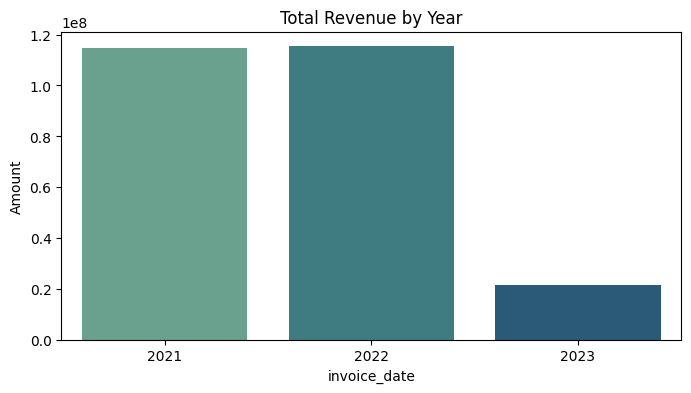

In [72]:
#Yearly Sales Trend
# Total sales per year
yearly_sales = df.groupby(df['invoice_date'].dt.year)['Amount'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='invoice_date', y='Amount', data=yearly_sales, palette="crest")
plt.title("Total Revenue by Year")
plt.show()

- This helps to quickly see whether revenue is increasing or slowing year by year.
From the graph, `2023` revenue looks lower — but this may be because we don’t have full data for 2023 yet.

/tmp/ipython-input-1669308200.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='Amount', data=quarterly_sales, palette="viridis")


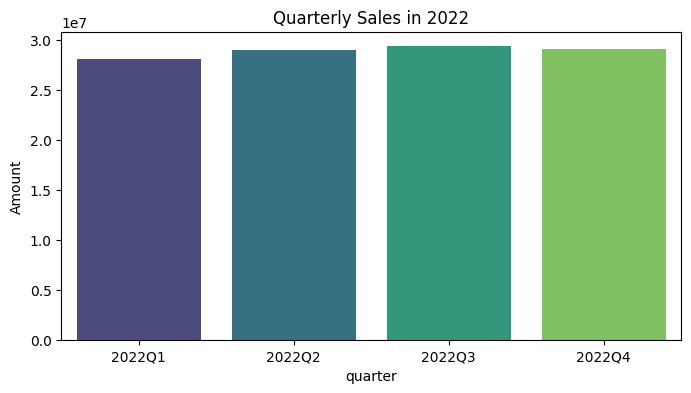

In [81]:
# Quartley sales analysis(selected year)
df['quarter'] = df['invoice_date'].dt.to_period('Q')
df['year'] = df['invoice_date'].dt.year

# Select a year for quarterly breakdown
year_filter = 2022 #change to check for other years
quarterly_sales = df[df['year'] == year_filter].groupby('quarter', as_index=False)['Amount'].sum()

plt.figure(figsize=(8,4))
sns.barplot(x='quarter', y='Amount', data=quarterly_sales, palette="viridis")
plt.title(f"Quarterly Sales in {year_filter}")
plt.show()


- `2022` was a stable year with no major fluctuations, suggesting steady business demand throughout the year.

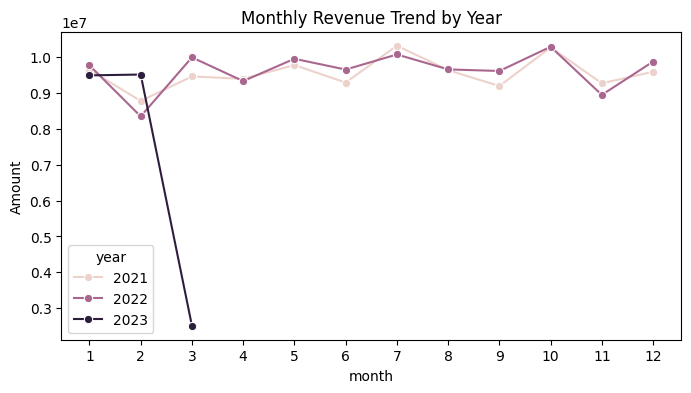

In [74]:
#Monthly Revenue by Year
monthly_sales = df.groupby(['year','month'], as_index=False)['Amount'].sum()

plt.figure(figsize=(8,4))
sns.lineplot(x='month', y='Amount', hue='year', data=monthly_sales, marker="o")
plt.title("Monthly Revenue Trend by Year")
plt.xticks(range(1,13))
plt.show()

- Revenue is consistent month to month, and the drop in 2023 is just because we don’t have all the data.

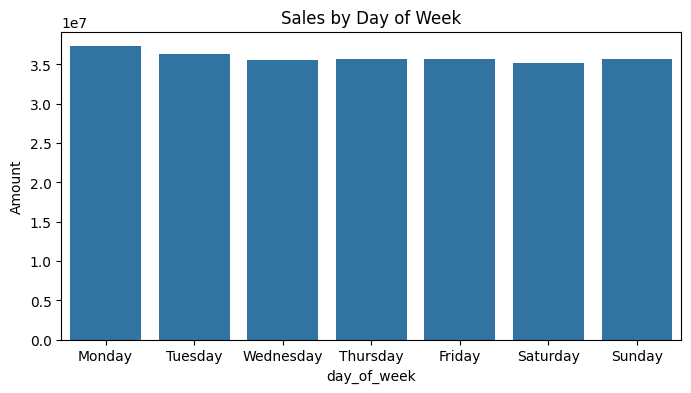

In [77]:
#Sales by Day of the Week
df['day_of_week'] = df['invoice_date'].dt.day_name()
weekday_sales = df.groupby('day_of_week', as_index=False)['Amount'].sum()

plt.figure(figsize=(8,4))
sns.barplot(x='day_of_week', y='Amount', data=weekday_sales,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Sales by Day of Week")
plt.show()


- Sales are evenly distributed across the week, with a slight advantage on Mondays. This suggests the business does not heavily rely on weekend or weekday effects.

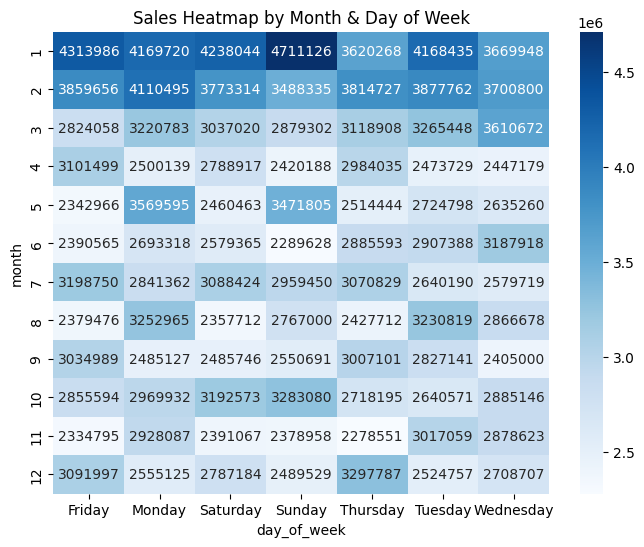

In [82]:
#Heatmap: Month vs Day of Week
df['month'] = df['invoice_date'].dt.month
heatmap_data = df.groupby(['month','day_of_week'])['Amount'].sum().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f")
plt.title("Sales Heatmap by Month & Day of Week")
plt.show()

- January and February have the higher sales.

- May, June, and November have the lower sales.

- Mondays and Thursdays often show better sales compared to other days.

- Sales are steady across all days of the week, meaning weekends are not much different from weekdays.

# Conclusion

- People mostly like to buy clothing, shoes, cosmetics, and food, but in terms of revenue, clothing contributes the most, followed by shoes and technology, since these categories are higher priced. Customers in the 35–45 age group spend more. The female customer base is larger, and women also spend more than men overall. Cash is the most preferred payment method, and malls like `Mall of Instanbul` and `Kanyon` generate the highest sales and footfall.
- Sales are steady and reliable with no extreme fluctuations. The business does not depend heavily on a specific month, quarter, or weekday — which is a good sign of stability.

Complete Project on GitHub: https://github.com/padmavarshini19/Sales-Analysis-Python